In [2]:
import numpy as np
from scipy.special import lpmn as lpmn
from scipy.interpolate import interp1d
import numpy.polynomial.legendre as lgdr
import healpy as h
import scipy.integrate as intg
import time
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [3]:
lpmn?

In [748]:
nside=256
lmax=3*nside
ell=arange(lmax+1)
omega=4.*pi/h.nside2npix(nside)

beta0=min(180.,180.*24./lmax) ; print beta0

# Populates the array of Pl2 legendre functions
theta=linspace(0.,4.*beta0*pi/180.,2000)
pl2=np.zeros((lmax+1,np.size(theta)),float)
for i in range(theta.size):
    y,temp=lpmn(2,lmax,np.cos(theta[i]))
    for l in range(lmax+1):
        pl2[l,i]=y[2,l]
        
def pl2norm(l1):
    return 2.*pi/(((l1+2)*(l1+1)*l1*(l1-1))**0.5)

# Calculating the radial part of the convolution kernel.
rbeta=np.zeros(theta.size,float)
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        rbeta[i]=rbeta[i] + ((2.*l+1)/(4.*pi))*pl2[l,i]*(1./((l+2)*(l+1)*(l-1)*l)**0.5)     

5.625


<IPython.core.display.Javascript object>


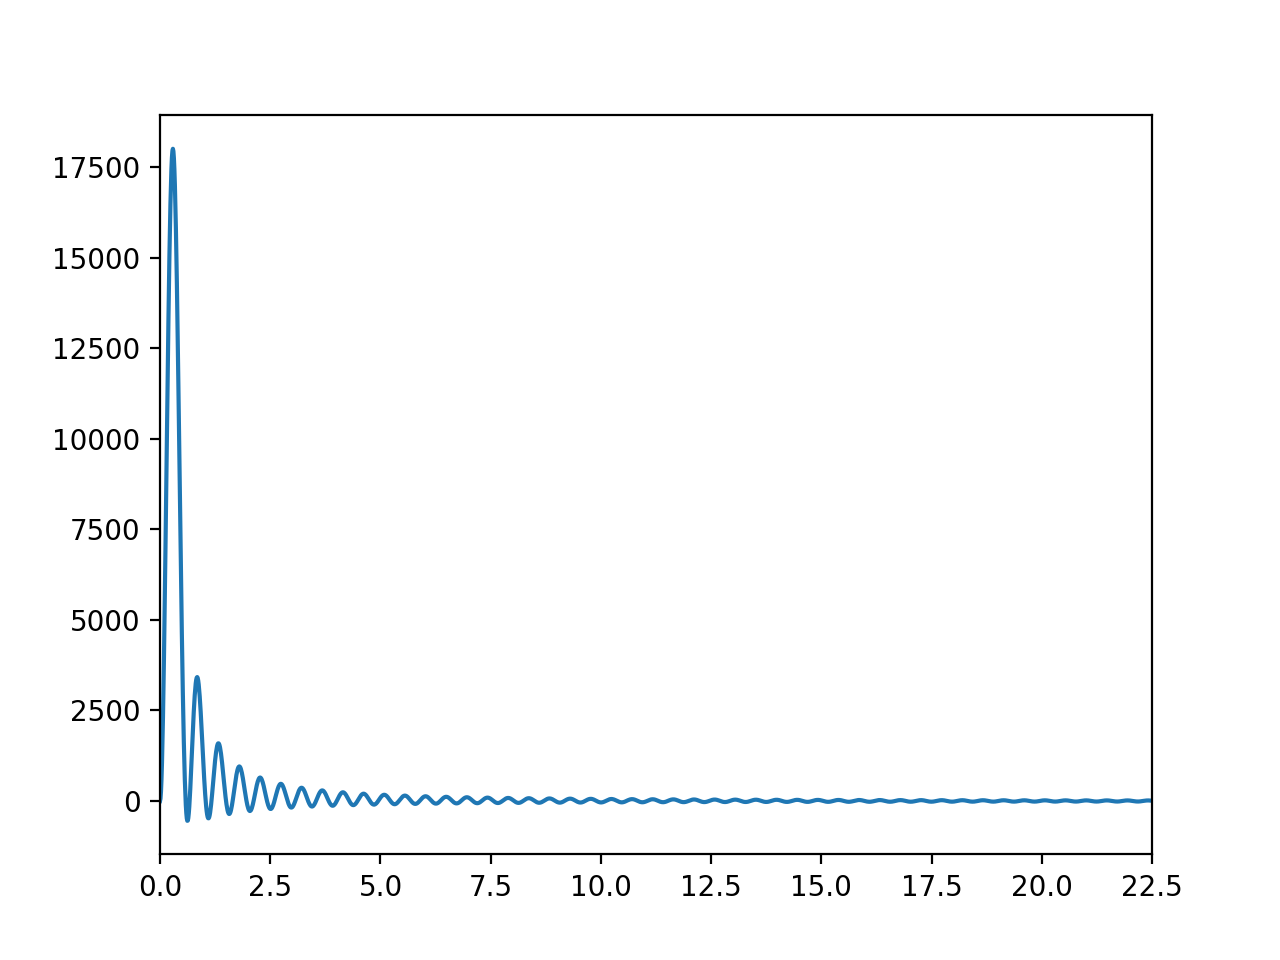

(0, 22.5)

In [750]:
figure()
plot(theta*180./pi,rbeta)
xlim(0,4*beta0)

2.8125 0.5625
5.625 2.8125


<IPython.core.display.Javascript object>


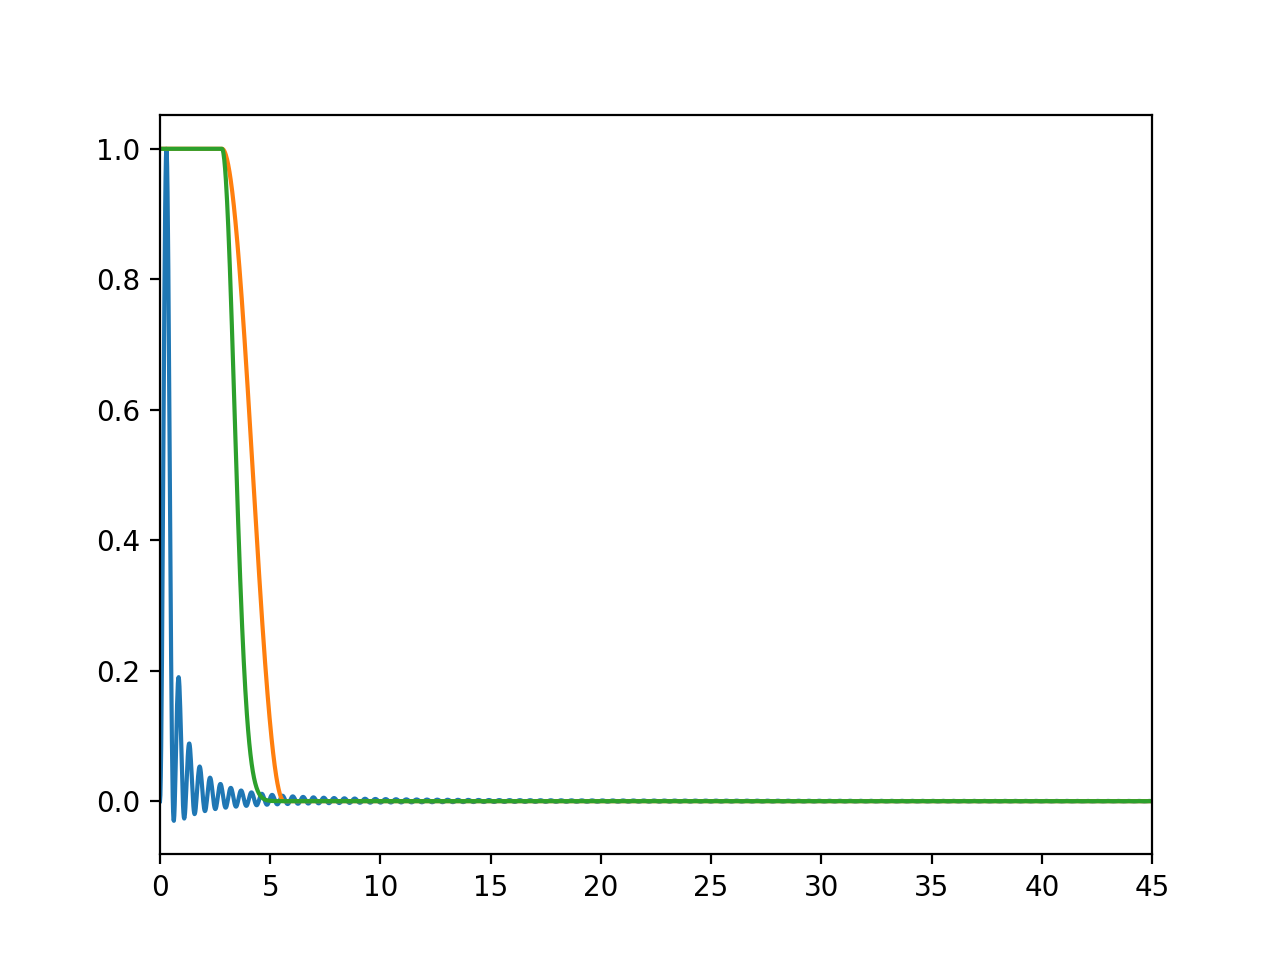

(0, 45)

In [648]:
# Gaussian profile
x0=0.5*beta0 ; apow=0.1*beta0
print x0,apow
x0=x0*np.pi/180. ; apow=apow*np.pi/180
stepfn_guass=np.zeros(theta.size,float)
xp=((theta-x0)**2)/(2.*apow**2.)
stepfn_gauss=exp(-xp)
stepfn_gauss[theta<=x0]=1.
        
# Defining a step function which defines the radial cutoff of the convolution kernel.
x0=beta0 ; apow=0.5*beta0
print x0,apow
x0=x0*np.pi/180. ; apow=apow*np.pi/180
# Cos squared profile
stepfn_cossq=np.zeros(theta.size,float)
xp=(theta-(x0-apow))*np.pi/(2.*apow)
stepfn_cossq=cos(xp)**2.
stepfn_cossq[theta<=(x0-apow)]=1.
stepfn_cossq[theta>x0]=0.

figure()
plot(theta*180./pi,rbeta/max(rbeta))
plot(theta*180./pi,stepfn_cossq)
plot(theta*180./pi,stepfn_gauss)
xlim(0,45)

In [739]:
effbl_cossq=np.zeros(lmax+1,float)
effbl_gauss=np.zeros(lmax+1,float)
for i in range(lmax-1):
    l1=i+2
    
    y=rbeta*stepfn_cossq*pl2[l1,:]*np.sin(theta)
    integrand=interp1d(theta,y,kind="cubic")
    effbl_cossq[l1]=intg.quadrature(integrand,0.,x0,rtol=1e-6,tol=1e-8,maxiter=500)[0]*pl2norm(l1)
    
    y=rbeta*stepfn_gauss*pl2[l1,:]*np.sin(theta)
    integrand=interp1d(theta,y,kind="cubic")
    effbl_gauss[l1]=intg.quadrature(integrand,0.,x0,rtol=1e-6,tol=1e-8,maxiter=500)[0]*pl2norm(l1)

figure()
plot(ell,effbl_gauss)
plot(ell,effbl_cossq,"--")
#ylim(.5,1.5)

ValueError: operands could not be broadcast together with shapes (2000,) (10000,) 

In [650]:
# Reconstruct rbeta from effbl
rec_rbeta_cossq=np.zeros(theta.size,float)
rec_rbeta_gauss=np.zeros(theta.size,float)
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        rec_rbeta_cossq[i]=rec_rbeta_cossq[i] + ((2.*l+1)/(4.*pi))*effbl_cossq[l]*pl2[l,i]*(1./((l+2)*(l+1)*(l-1)*l)**0.5)
        rec_rbeta_gauss[i]=rec_rbeta_gauss[i] + ((2.*l+1)/(4.*pi))*effbl_gauss[l]*pl2[l,i]*(1./((l+2)*(l+1)*(l-1)*l)**0.5)

<IPython.core.display.Javascript object>


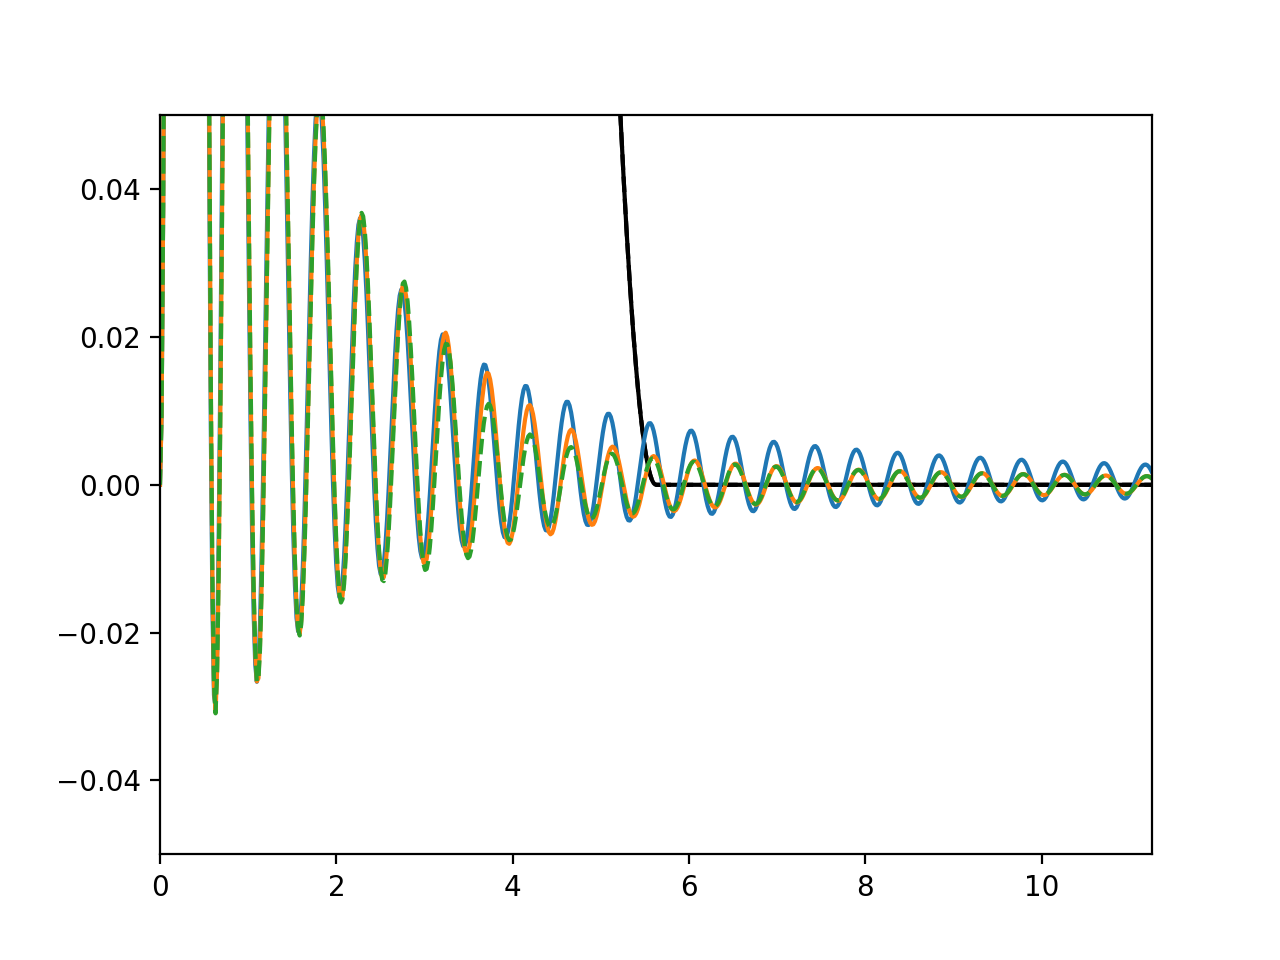

(-0.05, 0.05)

In [651]:
figure()
plot(theta*180./pi,stepfn_cossq,"k-")
plot(theta*180./pi,stepfn_cossq,"k--")
plot(theta*180./pi,rbeta/max(rbeta),"-")
plot(theta*180./pi,rec_rbeta_cossq/max(rec_rbeta_cossq),"-")
plot(theta*180./pi,rec_rbeta_gauss/max(rec_rbeta_gauss),"--")
xlim(0,2*beta0)
ylim(-0.05,0.05)

<IPython.core.display.Javascript object>


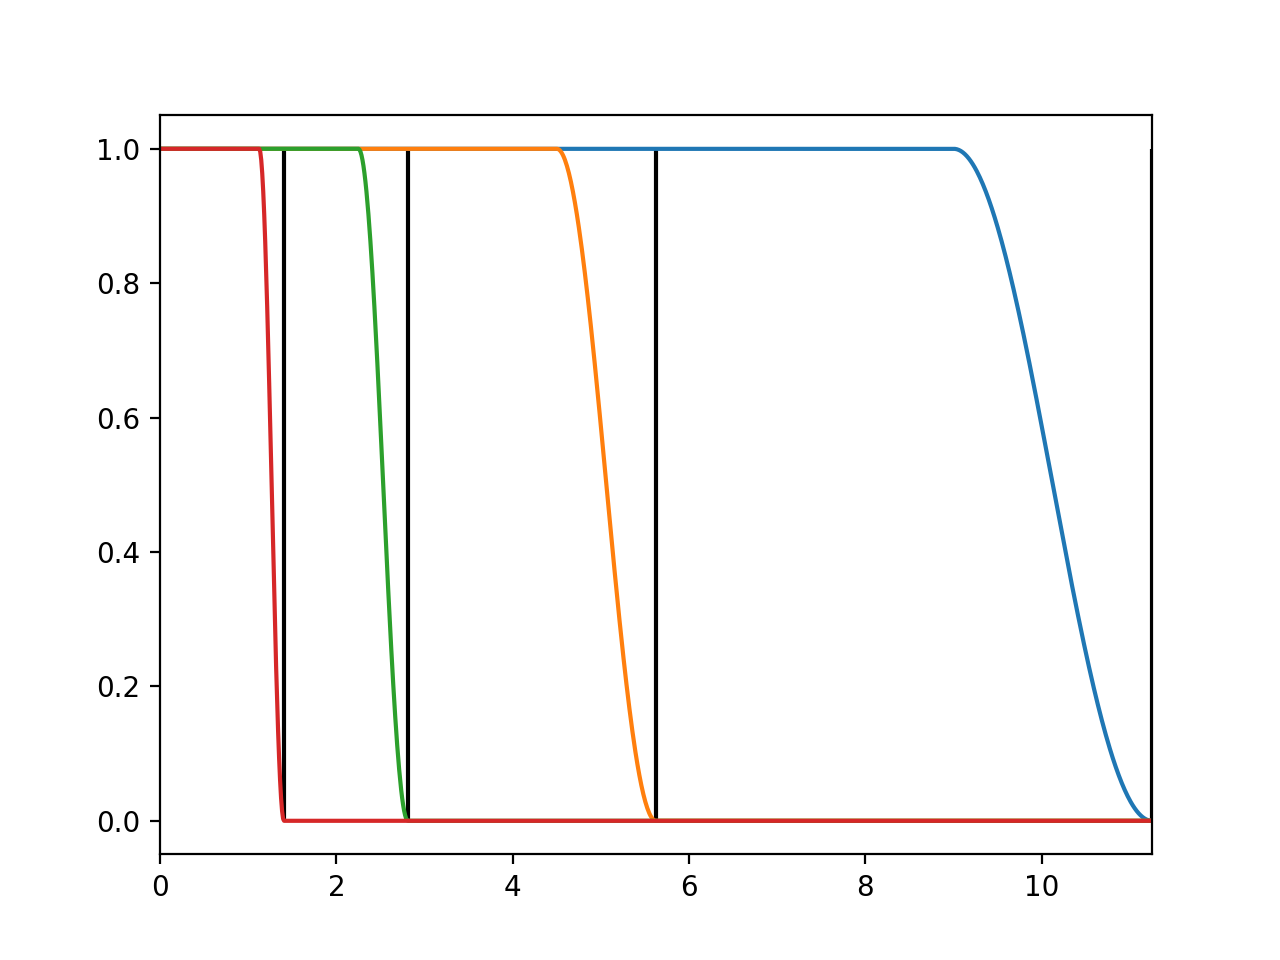

(0, 11.25)

In [751]:
stepfn_2b=np.zeros(theta.size,float)
x0=2.*beta0 ; apow=0.2*x0
x0=x0*np.pi/180. ; apow=apow*np.pi/180
xp=(theta-(x0-apow))*np.pi/(2.*apow)
stepfn_2b=cos(xp)**2.
stepfn_2b[theta<=(x0-apow)]=1.
stepfn_2b[theta>x0]=0.

stepfn_1b=np.zeros(theta.size,float)
x0=1.*beta0 ; apow=0.2*x0
x0=x0*np.pi/180. ; apow=apow*np.pi/180
xp=(theta-(x0-apow))*np.pi/(2.*apow)
stepfn_1b=cos(xp)**2.
stepfn_1b[theta<=(x0-apow)]=1.
stepfn_1b[theta>x0]=0.

stepfn_p5b=np.zeros(theta.size,float)
x0=0.5*beta0 ; apow=0.2*x0
x0=x0*np.pi/180. ; apow=apow*np.pi/180
xp=(theta-(x0-apow))*np.pi/(2.*apow)
stepfn_p5b=cos(xp)**2.
stepfn_p5b[theta<=(x0-apow)]=1.
stepfn_p5b[theta>x0]=0.

stepfn_p25b=np.zeros(theta.size,float)
x0=0.25*beta0 ; apow=0.2*x0
x0=x0*np.pi/180. ; apow=apow*np.pi/180
xp=(theta-(x0-apow))*np.pi/(2.*apow)
stepfn_p25b=cos(xp)**2.
stepfn_p25b[theta<=(x0-apow)]=1.
stepfn_p25b[theta>x0]=0.

figure()
plot(theta*180./pi,stepfn_2b) ; vlines(2*beta0,0,1)
plot(theta*180./pi,stepfn_1b) ; vlines(1*beta0,0,1)
plot(theta*180./pi,stepfn_p5b) ; vlines(0.5*beta0,0,1)
plot(theta*180./pi,stepfn_p25b) ; vlines(0.25*beta0,0,1)
xlim(0,2*beta0)

In [668]:
effbl_2b=np.zeros(lmax+1,float)
effbl_1b=np.zeros(lmax+1,float)
effbl_p5b=np.zeros(lmax+1,float)
effbl_p25b=np.zeros(lmax+1,float)
for i in range(lmax-1):
    l1=i+2
    
    y=rbeta*stepfn_2b*pl2[l1,:]*np.sin(theta)
    integrand=interp1d(theta,y,kind="cubic")
    effbl_2b[l1]=intg.quadrature(integrand,0.,2.*beta0*pi/180.,rtol=1e-8,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    
    y=rbeta*stepfn_1b*pl2[l1,:]*np.sin(theta)
    integrand=interp1d(theta,y,kind="cubic")
    effbl_1b[l1]=intg.quadrature(integrand,0.,1.*beta0*pi/180.,rtol=1e-8,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    
    y=rbeta*stepfn_p5b*pl2[l1,:]*np.sin(theta)
    integrand=interp1d(theta,y,kind="cubic")
    effbl_p5b[l1]=intg.quadrature(integrand,0.,0.5*beta0*pi/180.,rtol=1e-8,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    
    y=rbeta*stepfn_p25b*pl2[l1,:]*np.sin(theta)
    integrand=interp1d(theta,y,kind="cubic")
    effbl_p25b[l1]=intg.quadrature(integrand,0.,0.25*beta0*pi/180.,rtol=1e-8,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)

In [686]:
figure()
plot(ell,-100*(1.-effbl_2b**2.),"r-",label=r"$r_{\rm cutoff} =2 \beta_0$")
plot(ell,-100.*(1.-effbl_1b**2.),"b-",label=r"$r_{\rm cutoff} = \beta_0$")
plot(ell,-100.*(1.-effbl_p5b**2.),"g-",label=r"$r_{\rm cutoff} =0.5 \beta_0$")
plot(ell,-100.*(1.-effbl_p25b**2.),"c-",label=r"$r_{\rm cutoff} =0.25\beta_0$")
fill_between(ell,-sqrt(2./(2.*ell+1))*100,sqrt(2./(2.*ell+1))*100,color="black",alpha=0.15,label="Cosmic variance")
fill_between(ell,-0.5*sqrt(2./(2.*ell+1))*100,0.5*sqrt(2./(2.*ell+1))*100,color="black",alpha=0.15,label="")

axhline(-2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
axhline(2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
grid(alpha=0.2,linestyle="solid")
text(52,14.2,r"$1 \sigma$",fontsize=5)
text(51,7.2,r"$0.5 \sigma$",fontsize=5)
text(51,2.8,r"$2 \%$",fontsize=5)


legend(loc=0,ncol=2,title=r"$\beta_0=" + str(round(beta0,2)) + "^{\circ}$" + "$\ell_{\rm max} =" +str(lmax)+ "$")
grid(alpha=0.4)
ylim(-100,100)
#xlim(-100,3.2*nside)
xlim(-10,3100)


#semilogx()
figname="../../figures/analytical_cl_oscillations_beta" + str(int(beta0)) + "_lmax" + str(lmax) + ".pdf"
savefig(figname,dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>

ValueError: 
$\beta_0=1.41^{\circ}$$\ell_{m max} =3072$
                      ^
Expected end of text (at char 22), (line:1, col:23)

In [869]:
ell=arange(3*64+1)
rteb0=h.read_map("../../figures/simulated/qu2eb/generated_data/rteb_2beta.fits",(0,1,2))
rteb1=h.read_map("../../figures/simulated/qu2eb/generated_data/rteb_1beta.fits",(0,1,2))
rteb2=h.read_map("../../figures/simulated/qu2eb/generated_data/rteb_0p5beta.fits",(0,1,2))
rteb3=h.read_map("../../figures/simulated/qu2eb/generated_data/rteb_0p25beta.fits",(0,1,2))
teb=h.read_map("../../figures/simulated/qu2eb/generated_data/teb.fits",(0,1,2))

cld=h.alm2cl(h.map2alm(teb,pol=False,lmax=3*nside))
clrteb0=h.alm2cl(h.map2alm(rteb0,pol=False,lmax=3*nside))
clrteb1=h.alm2cl(h.map2alm(rteb1,pol=False,lmax=3*nside))
clrteb2=h.alm2cl(h.map2alm(rteb2,pol=False,lmax=3*nside))
clrteb3=h.alm2cl(h.map2alm(rteb3,pol=False,lmax=3*nside))

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [870]:
odisc=beta0
figure()
std=cld[1]/100.
plot(ell,(clrteb3[1]-cld[1])/std,"c-",lw=1,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,(clrteb2[1]-cld[1])/std,"g-",lw=1,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,(clrteb1[1]-cld[1])/std,"b-",lw=1,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,(clrteb0[1]-cld[1])/std,"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
#plot(ell,(clrteb4[1]-cld[1])/std,"m-",lw=1,label=r"$r_{\rm cutoff} = 4\beta_{o}$")
fill_between(ell,-sqrt(2./(2.*ell+1))*100,sqrt(2./(2.*ell+1))*100,color="black",alpha=0.15,label="Cosmic variance")
fill_between(ell,-0.5*sqrt(2./(2.*ell+1))*100,0.5*sqrt(2./(2.*ell+1))*100,color="black",alpha=0.15,label="")
ylim(-45,45)
xlim(2,3*nside)
xlabel("multipole,$\ell$")
ylabel(r"$(\Delta C^{EE}_{\ell}/C^{EE}_{\ell}) ~\times 100 ~\%$")
legend(loc="lower center",fontsize=10,ncol=2,title=r"$\beta_o=" + str(odisc) + "^{\circ}$")
axhline(-2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
axhline(2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
grid(alpha=0.2,linestyle="solid")
text(52,14.2,r"$1 \sigma$",fontsize=5)
text(51,7.2,r"$0.5 \sigma$",fontsize=5)
text(51,2.8,r"$2 \%$",fontsize=5)

plot(ell,-100*(1.-effbl_2b**2.),"r-",lw=4,alpha=0.4,label=r"$r_{\rm cutoff} =2 \beta_0$")
plot(ell,-100.*(1.-effbl_1b**2.),"b-",lw=4,alpha=0.4,label=r"$r_{\rm cutoff} = \beta_0$")
plot(ell,-100.*(1.-effbl_p5b**2.),"g-",lw=4,alpha=0.4,label=r"$r_{\rm cutoff} =0.5 \beta_0$")
plot(ell,-100.*(1.-effbl_p25b**2.),"c-",lw=4,alpha=0.4,label=r"$r_{\rm cutoff} =0.25\beta_0$")

#semilogx()
figname="../../figures/analytical_cl_oscillations_vs_data.pdf"
savefig(figname,dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (193,) and (6145,)

<IPython.core.display.Javascript object>


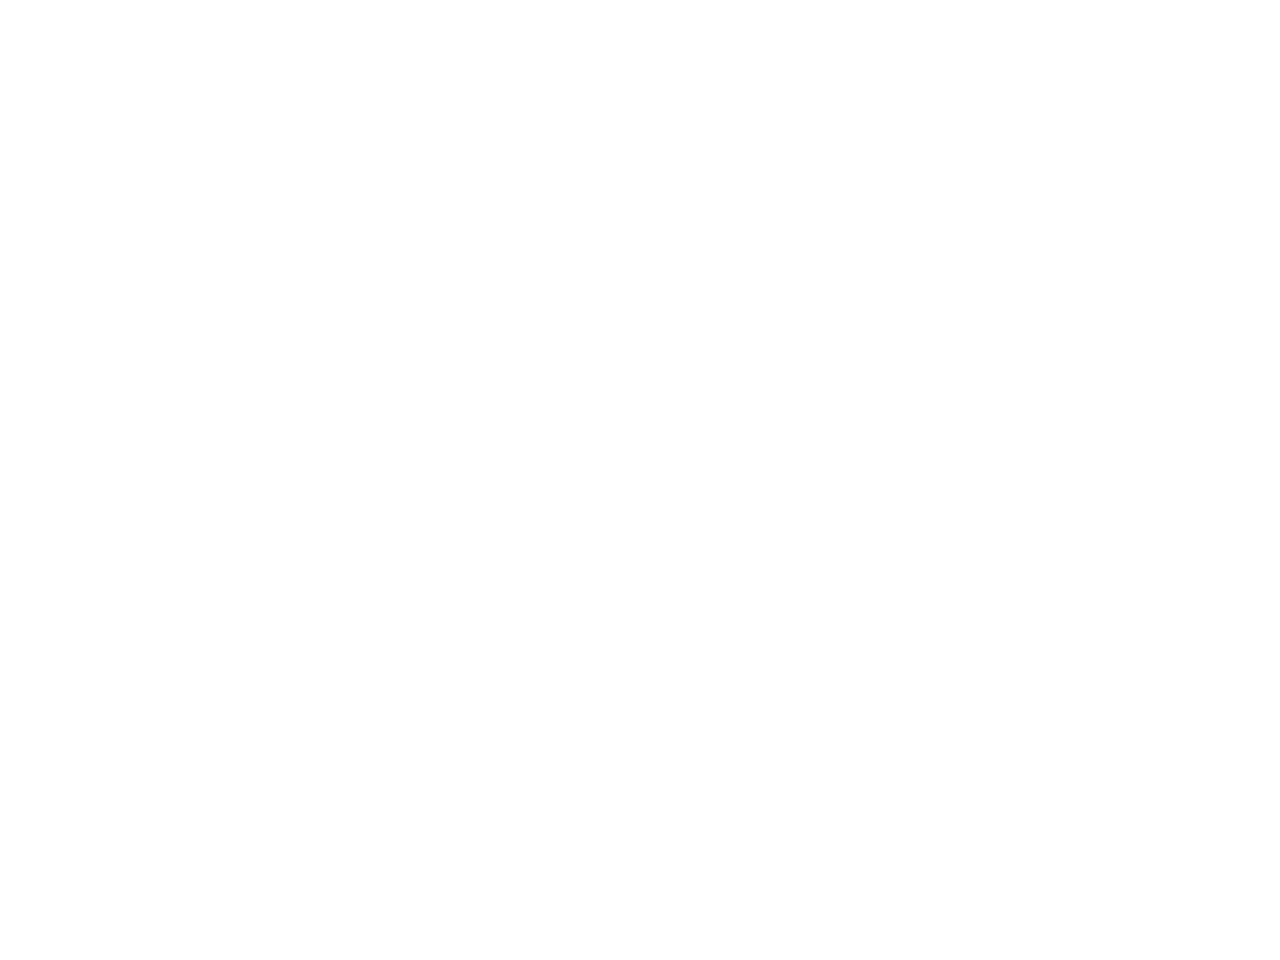

ValueError: operands could not be broadcast together with shapes (193,) (1537,) 

In [868]:
odisc=beta0
figure()
std=cld[1]/100.
plot(ell,(clrteb3[1]/effbl_p25b**2-cld[1])/std,"c-",lw=1,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,(clrteb2[1]/effbl_p5b**2-cld[1])/std,"g-",lw=1,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,(clrteb1[1]/effbl_1b**2-cld[1])/std,"b-",lw=1,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,(clrteb0[1]/effbl_2b**2-cld[1])/std,"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
#plot(ell,(clrteb4[1]-cld[1])/std,"m-",lw=1,label=r"$r_{\rm cutoff} = 4\beta_{o}$")
fill_between(ell,-sqrt(2./(2.*ell+1))*100,sqrt(2./(2.*ell+1))*100,color="black",alpha=0.15,label="Cosmic variance")
fill_between(ell,-0.5*sqrt(2./(2.*ell+1))*100,0.5*sqrt(2./(2.*ell+1))*100,color="black",alpha=0.15,label="")
#ylim(-45,45)
xlim(2,3*nside)
xlabel("multipole,$\ell$")
ylabel(r"$(\Delta C^{EE}_{\ell}/C^{EE}_{\ell}) ~\times 100 ~\%$")
legend(loc="lower center",fontsize=10,ncol=2,title=r"$\beta_o=" + str(odisc) + "^{\circ}$")
axhline(-2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
axhline(2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
grid(alpha=0.2,linestyle="solid")
text(52,14.2,r"$1 \sigma$",fontsize=5)
text(51,7.2,r"$0.5 \sigma$",fontsize=5)
text(51,2.8,r"$2 \%$",fontsize=5)
semilogx()

In [701]:
def gbeta(x,x0=15.,sigma=5.,n=2.):
    x0=x0*pi/180.
    sigma=sigma*pi/180.
    return (x**n)*exp(-((x-x0)/(sqrt(2.)*sigma))**2.)

def gbetasq(x,x0=15.,sigma=5.,n=2.):
    return gbeta(x,x0,sigma,n)**2.

pixsize=sqrt(4.*pi/h.nside2npix(nside))*180./pi
print pixsize

0.916129709818


In [702]:
def root(shift,width,slope):
    y=max(0.5*(shift + sqrt(shift**2. + 4 *slope*width*width)),0.5*(shift - sqrt(shift**2. + 4 *slope*width*width)))
    return y

In [720]:
shift=1.2 ; width=0.6; slope=2
norm=intg.quad(gbetasq,0,pi,args=(shift,width,slope))[0]
print "Norm:",norm

y0=gbeta(theta,shift,width,slope)/norm

Norm: 4.51324652705e-09


In [867]:
nside=2048
lmax=3*nside
ell=arange(lmax+1)

beta0=min(180.,180.*24./lmax) ; print beta0

# Populates the array of Pl2 legendre functions
theta=linspace(0.,3.*beta0*pi/180.,3000)


pl2=np.zeros((lmax+1,np.size(theta)),float)
for i in range(theta.size):
    y,temp=lpmn(2,lmax,np.cos(theta[i]))
    for l in range(lmax+1):
        pl2[l,i]=y[2,l]             

0.703125


In [1]:
lpmn?

Object `lpmn` not found.


In [859]:
rbeta=np.zeros(theta.size,float)
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        rbeta[i]=rbeta[i] + ((2.*l+1)/(4.*pi))*pl2[l,i]*(1./((l+2)*(l+1)*(l-1)*l)**0.5)

In [860]:
effbl_p25b=np.zeros(lmax+1,float)
effbl_p5b=np.zeros(lmax+1,float)
effbl_1b=np.zeros(lmax+1,float)
effbl_2b=np.zeros(lmax+1,float)
effbl_3b=np.zeros(lmax+1,float)

stepfn=np.zeros(theta.size,float)
x0=4.*beta0 ; apow=0.2*x0
x0=x0*np.pi/180. ; apow=apow*np.pi/180
xp=(theta-(x0-apow))*np.pi/(2.*apow)
stepfn=cos(xp)**2.
stepfn[theta<=(x0-apow)]=1.
stepfn[theta>x0]=0.
alpha=1. ; print alpha*beta0
for i in range(lmax-1):
    l1=i+2
    #y=y0*pl2[l1,:]*np.sin(theta)
    y=rbeta*pl2[l1,:]*np.sin(theta)
    integrand=interp1d(theta,y,kind="cubic")
    #effbl[l1]=intg.quadrature(integrand,0.,(shift+10.*width)*pi/180.,rtol=1e-6,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    effbl_p25b[l1]=intg.quadrature(integrand,0.,(0.25*beta0)*pi/180.,rtol=1e-6,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    effbl_p5b[l1]=intg.quadrature(integrand,0.,(0.5*beta0)*pi/180.,rtol=1e-6,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    effbl_1b[l1]=intg.quadrature(integrand,0.,(1*beta0)*pi/180.,rtol=1e-6,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    effbl_2b[l1]=intg.quadrature(integrand,0.,(2.*beta0)*pi/180.,rtol=1e-6,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)
    effbl_3b[l1]=intg.quadrature(integrand,0.,(3.*beta0)*pi/180.,rtol=1e-6,tol=1e-8,maxiter=5000)[0]*pl2norm(l1)

2.8125


<IPython.core.display.Javascript object>


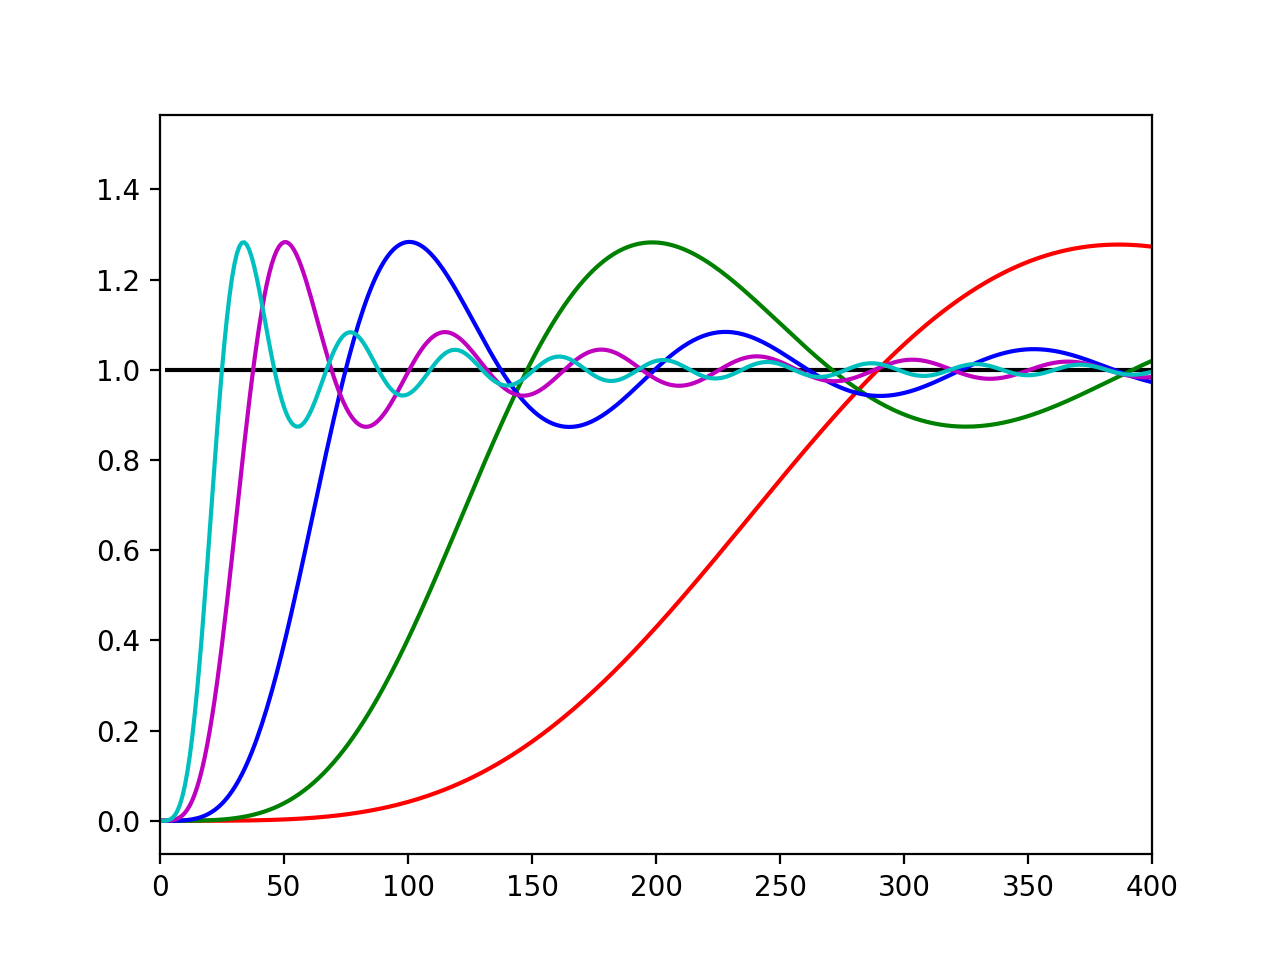

(0, 400)

In [866]:
figure()
plot(ell,effbl_p25b**2.,"r-")
plot(ell,effbl_p5b**2.,"g-")
plot(ell,effbl_1b**2.,"b-")
plot(ell,effbl_2b**2.,"m-")
plot(ell,effbl_3b**2.,"c-")
hlines(1,2,lmax)
#loglog()
xlim(0,400)

In [862]:
recgbeta=np.zeros(theta.size,float)
gbetainv=np.zeros(theta.size,float)
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        recgbeta[i]=recgbeta[i] + ((2.*l+1)/(4.*pi))*effbl[l]*pl2[l,i]*(1./((l+2)*(l+1)*(l-1)*l)**0.5)
        gbetainv[i]=gbetainv[i] + ((2.*l+1)/(4.*pi))*(1./effbl[l])*pl2[l,i]*(1./((l+2)*(l+1)*(l-1)*l)**0.5)

IndexError: index 769 is out of bounds for axis 0 with size 769

In [ ]:
figure()
plot(theta*180./pi,recgbeta/max(rbeta*stepfn_2b),"-")
plot(theta*180./pi,rbeta*stepfn_p25b/max(rbeta*stepfn_2b),"--")
#plot(theta*180./pi,rbeta/max(rbeta*stepfn_2b))
#plot(theta*180./pi,rbeta*stepfn_2b/max(rbeta*stepfn_2b),"k-")
#plot(theta*180./pi,gbetainv/max(gbetainv),"--")
xlim(0*beta0,1*beta0)
#ylim(-0.02,0.02)
#semilogy()

In [773]:
figure()
appstr="; $[n=" + str(slope) + r"^{\circ}, \beta_0=" + str(shift) + r"^{\circ}, \sigma=" + str(width) + "^{\circ}]$" 
plot(theta*180./pi,rbeta/max(rbeta),label=r"Default $f(\beta)$")
plot(theta*180./pi,y0/max(y0),label=r"$ G(\beta) = \mathcal{N} x^n \exp{\frac{(\beta-\beta_0)^2}{2 \sigma^2}}$" + appstr)
plot(theta*180./pi,recgbeta/max(recgbeta),"--",label=r"Reconstructed $G(\beta)$ from $g_{\ell}$ $[\ell_{\rm max} =" +str(lmax) +"]$")
vlines(pixsize,0,1,linestyle="dashed",label="Nside=64 pixel size")
hlines(0,0,180,linestyle="dashed")
#xlim(0,root(shift,width,slope)+10*width)
xlim(0,0.5*beta0)
ylabel(r"$ G(\beta)$")
xlabel(r"$\beta$ degrees")
legend(loc=0)
figname="../../figures/example_gbeta.pdf"
savefig(figname,dpi=300,bbox_inches="tight")

figure()
plot(ell,effbl)
ylabel("$g_{\ell}$")
hlines(0,0,lmax,linestyle="dashed")
xlabel("multipole, ${\ell}$")
figname="../../figures/example_eff_bl.pdf"
savefig(figname,dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (2000,) and (1000,)

In [4]:
bbeta=lgdr.legval(cos(theta),((2.*ell+1)/(4.*pi))*effbl,tensor=False)
beambl=lgdr.legfit(cos(theta),rbeta*stepfn_2b,lmax)*4.*pi/(2.*ell+1)


NameError: name 'theta' is not defined

<IPython.core.display.Javascript object>


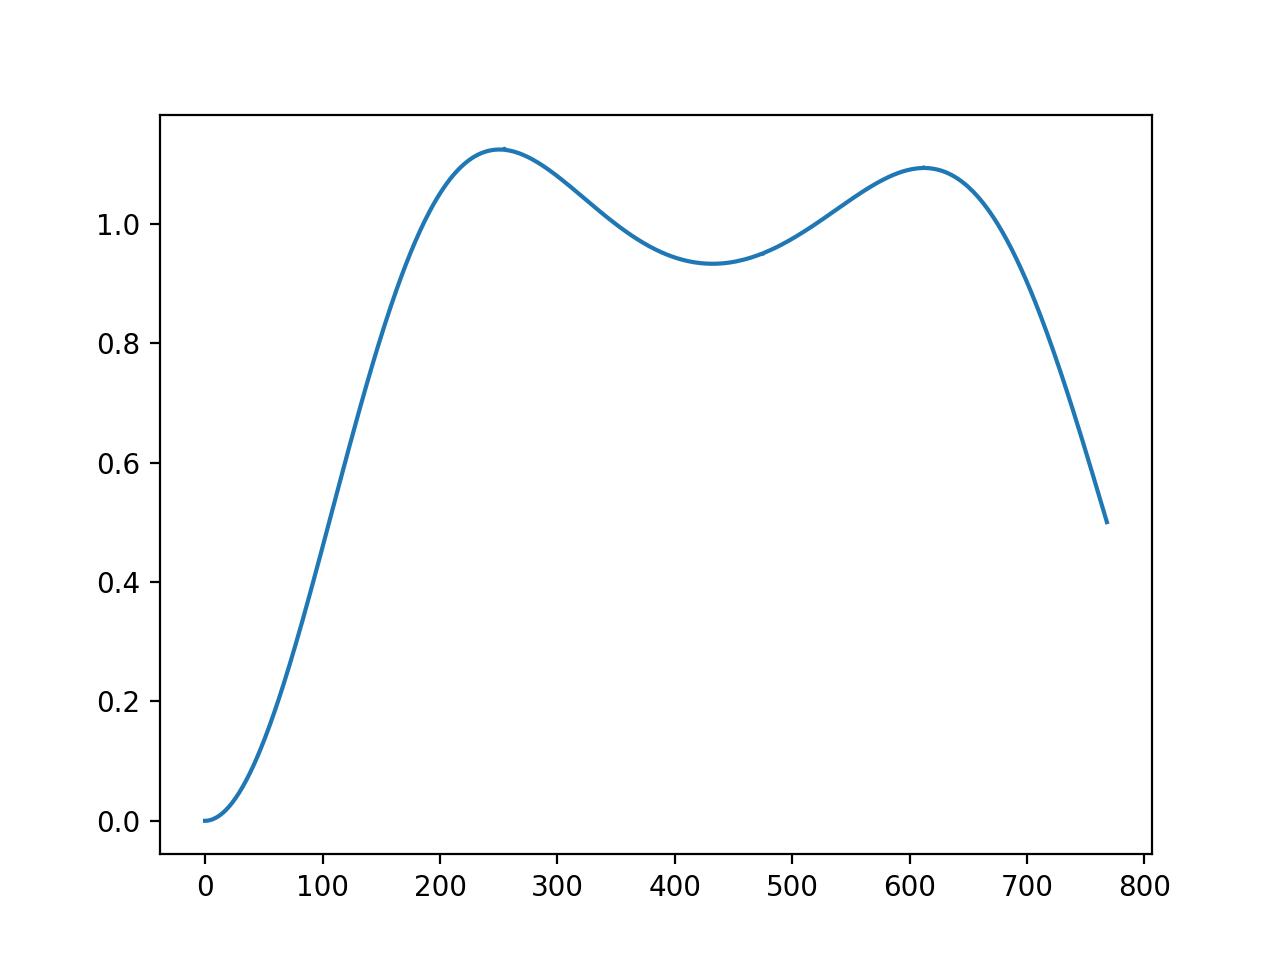

NameError: name 'y1' is not defined